In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import cohen_kappa_score

In [3]:
df = pd.read_csv("ORGANICS.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 13 columns):
ID                 22223 non-null int64
DemAffl            21138 non-null float64
DemAge             20715 non-null float64
DemCluster         21549 non-null float64
DemClusterGroup    21549 non-null object
DemGender          19711 non-null object
DemReg             21758 non-null object
DemTVReg           21758 non-null object
PromClass          22223 non-null object
PromSpend          22223 non-null float64
PromTime           21942 non-null float64
TargetBuy          22223 non-null int64
TargetAmt          22223 non-null int64
dtypes: float64(5), int64(3), object(5)
memory usage: 2.2+ MB
None


In [5]:
def missing_values(df):
        mis_values = df.isnull().sum()
        mis_values_percent = 100 * df.isnull().sum() / len(df)
        mis_values_table = pd.concat([mis_values, mis_values_percent], axis=1)
        mis_values_table_ren_columns = mis_values_table.rename(
        columns = {0 : 'Missed Values', 1 : '% of All Values'})
        mis_values_table_ren_columns = mis_values_table_ren_columns[
            mis_values_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of All Values', ascending=False).round(1)
        return mis_values_table_ren_columns

In [6]:
missing_values(df)

,Missed Values,% of All Values
DemGender,2512,11.3
DemAge,1508,6.8
DemAffl,1085,4.9
DemCluster,674,3.0
DemClusterGroup,674,3.0
DemReg,465,2.1
DemTVReg,465,2.1
PromTime,281,1.3


In [9]:
df = df.fillna(df.mean())

In [13]:
x = df[['DemAffl',  'DemAge', 'DemCluster', 'PromSpend', 'PromTime']]
y = df['TargetBuy']
y = y.astype('int')

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y)
dtree = DecisionTreeClassifier(max_depth=4, random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [15]:
y_pred = dtree.predict(X_test)
confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.7993160547156227

In [16]:
precision_score(y_test, y_pred)

0.6729559748427673

In [17]:
recall_score(y_test, y_pred)

0.38489208633093525

In [18]:
f1_score(y_test, y_pred)

0.4897025171624714

# Balance

In [19]:
balanced_accuracy_score(y_test, y_pred)

0.6612410503666198

In [20]:
cohen_kappa_score(y_test, y_pred)

0.3761238942330932

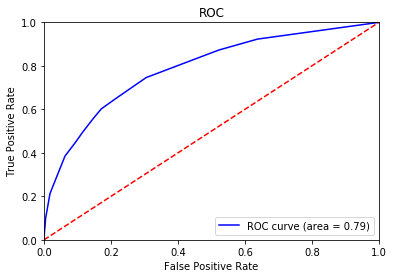

In [28]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
pred_prob = dtree.predict_proba(X_test)
pred = pred_prob[:, -1]
fpr, tpr, threshold = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)

plt.title('ROC')
plt.plot(fpr, tpr, 'b', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()